In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, how="inner", on=["city"])

# Display the data table for preview
print(len(city_ride_data))
print(len(ride_data))
print(len(city_data))
city_ride_data.head()

2375
2375
120


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
# Determine bubble plot variables

# Group by city
city_group = city_ride_data.groupby("city")

# Find average fare by city
average_fare = city_group["fare"].mean()

# Find total number of rides by city
total_rides = city_group["ride_id"].count()

# Find driver count by city
driver_count = city_group["driver_count"].first()

# Find city type
city_type = city_group["type"].first()

# Combine into summary dataframe
city_summary = pd.DataFrame(
    {"Number of Rides": total_rides,
     "Average Fare": average_fare,
     "Number of Drivers": driver_count,
     "Type of City": city_type
    }
)
    
city_summary.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

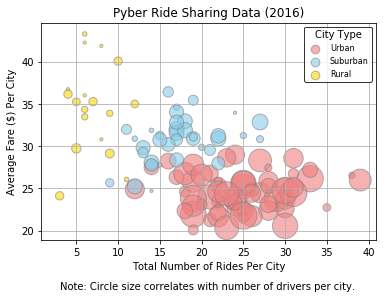

In [69]:
# Build the scatter plots for each city types

# Create separate data frames for urban, suburban, and rural cities
urban_df = city_summary.loc[city_summary["Type of City"] == "Urban"]
suburban_df = city_summary.loc[city_summary["Type of City"] == "Suburban"]
rural_df = city_summary.loc[city_summary["Type of City"] == "Rural"]

# Assign x and y axis values
x_urban = urban_df['Number of Rides']
y_urban = urban_df['Average Fare']
s_urban = urban_df['Number of Drivers']*10

x_suburban = suburban_df['Number of Rides']
y_suburban = suburban_df['Average Fare']
s_suburban = suburban_df['Number of Drivers']*10

x_rural = rural_df['Number of Rides']
y_rural = rural_df['Average Fare']
s_rural = rural_df['Number of Drivers']*10

# Build three scatter plots
plt.scatter(x_urban, y_urban, s=s_urban, marker="o", facecolors="lightcoral", edgecolors="grey", alpha=0.6, label="Urban")
plt.scatter(x_suburban, y_suburban, s=s_suburban, marker="o", facecolors="skyblue", edgecolors="grey", alpha=0.6, label="Suburban")
plt.scatter(x_rural, y_rural, s=s_rural, marker="o", facecolors="gold", edgecolors="grey", alpha=0.6, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.grid(True)

# Create a legend
legend = plt.legend(frameon = True, fontsize = 8, edgecolor = 'black', title="City Type")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(3, 13, "Note: Circle size correlates with number of drivers per city.")

# Save Figure
plt.savefig("pyber_bubble.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

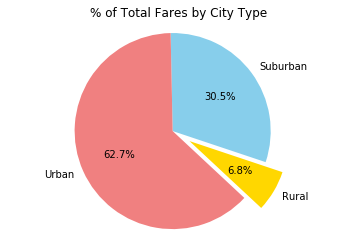

In [131]:
# Calculate total fares by city type
type_group = city_ride_data.groupby("type")
type_total_fares = type_group["fare"].sum()

# Color dictionary
type_color = {'Urban': 'lightcoral', 'Suburban': 'skyblue', 'Rural': 'gold'}

# Build Pie Chart
labels = type_total_fares.index
colors = [type_color[label] for label in labels]
explode = [0.2, 0, 0]

plt.pie(type_total_fares, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=False, startangle=317)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save figure
plt.savefig("fares_pie.png")

# Show figure
plt.show()

## Total Rides by City Type

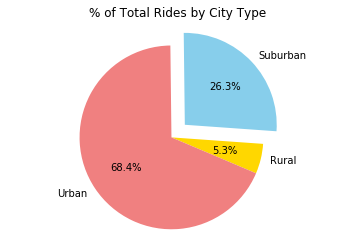

In [130]:
# Calculate total rides by city type
type_total_rides = type_group["ride_id"].count()

# Build Pie Chart
labels = type_total_rides.index
explode = [0, 0.2, 0]

plt.pie(type_total_rides, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=False, startangle=337)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save figure
plt.savefig("rides_pie.png")

# Show figure
plt.show()

## Total Drivers by City Type

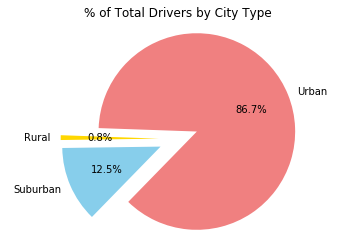

In [128]:
# Calculate total drivers by city type
type_total_drivers = type_group["driver_count"].sum()

# Build Pie Charts
labels = type_total_drivers.index
explode = [0.2, 0.2, 0.2]

plt.pie(type_total_drivers, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=False, startangle=178)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save figure
plt.savefig("drivers_pie.png")

# Show figure
plt.show()

# Trend Commentary

1) Not surprisingly, urban cities have more drivers and see more rides than suburban cities, and surban cities have more drivers and see more rides than rural cities.

2) At the same time, fares appear to be lower, on average, in urban areas than suburban and rural areas. 

3) The lower cost per ride in urban areas could in part be due to driver competition, but not exclusively, as several urban cities with a smaller number of drivers also appear to have low average fares. We'd want to test the relationship between ride distance and fares, as it's likely that ride share users in dense urban areas are taking shorter trips, which would keep fares down. 

